In [1]:
#KETERANGAN_0: TAHAPAN SENTIMENT ANALISIS TERDIRI ATAS 5 TAHAPAN : DATA PREPARATION, CLEANSING, FEATURE EXTRACTION, MODEL/ARCHITECTURE DAN EVALUATION
#LANGKAH 1 : MEMANGGIL LIBRARY YANG DIBUTUHKAN 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import string
import nltk

#LIBRARY TAHAP 1
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix


#LIBRARY TAHAP 2 : WORDCLOUD
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output

#LIBRARY TAHAP 3 : LIMETEXTEXPLAINER
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import string
from nltk.tokenize import word_tokenize
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

#LIBRARY TAHAP 3 : ARCHITECTURE RNN_LSTM_KERAS
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re



%matplotlib inline  


Using TensorFlow backend.
/home/rama/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rama/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rama/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rama/.local/lib/python3.7/site-packages/tensorflow/python/framewo

In [2]:
#LANGKAH 2 : MEMBACA DATA DALAM FORMAT CSV
dataset = pd.read_csv('suzuki.csv', sep =';', encoding='cp1252')
data= dataset[['final_sentiment', 'content']]
data.head()

,final_sentiment,content
0,0,'- ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½182ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...
1,2,"'"" DAIHATSU SIRION "" #KuisDaihatsu #DaihatsuS..."
2,2,"'"" SATRIA "" #SuzukiQuiz Kuy ikutan gaes di S..."
3,2,"'"" SATRIA "" #SuzukiQuiz Berjalan ke atas rota..."
4,2,"'"" SATRIA "" #SuzuqiQuiz #satria Armanih"


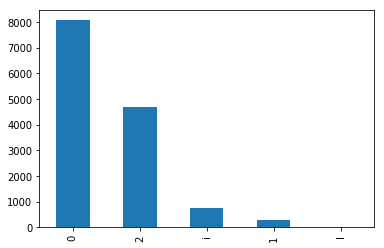

In [3]:
#LANGKAH 3 : MELAKUKAN EXPLORE DATA LEBIH MENDALAM
data['final_sentiment'].value_counts().plot(kind='bar')

In [4]:
#KETERANGAN_1 : GRAFIK BAR DIATAS MEMPERLIHATKAN 5 DATA FINAL_SENTIMENT. BELUM ADA SENTIMENT VALUE POSITIF ATAU NEGATIF.
#KETERANGAN_2 : NILAI SENTIMENT POSITIF DAN SENTIMENT NEGATIF SECARA BERURUTAN SAYA TENTUKAN ADALAH 2 DAN 1 
#KETERANGAN_3 : INDEKS 0, I , i SAYA HAPUS KARENA DIPERHATIKAN DAN DISESUIAKAN TERHADAP KOLOM CONTENT DAPAT DIAMBIL KESIMPULAN SPAM DAN TAK BERMAKNA

In [5]:
#LANGKAH 4 : MENGHAPUS INDEKS 0,I,i

In [6]:
data = data[data.final_sentiment != "i"]
data = data[data.final_sentiment != "0"]
data = data[data.final_sentiment != "I"]

In [7]:
# LANGKAH 5 : MELAKUKAN EKPLORASI KEMBALI DENGAN CARA MENAMPILKAN GRAFIK BAR SETELAH PENGHAPUSAN INDEKS

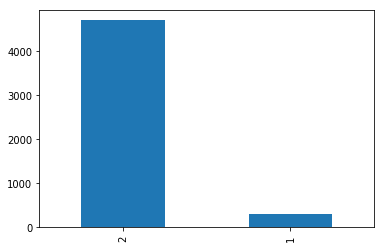

In [8]:
data['final_sentiment'].value_counts().plot(kind='bar')

In [9]:
#KETERANGAN_4: SETELAH DILAKUKAN PENHAPUSAN INDEKS, MAKA TERLIHAT DISTRIBUSI DATA ANTARA 2 DAN 1. 
#KETERANGAN_5: DATA YANG AKAN DIOLAH MEMILIKI MASALAH IMBALANCE.
#KETERANGAN_6: MENARIK UNTUK DIMODELKAN KARENA UNTUK MENGUJI APAKAH MODEL BIDA MEMBEDAKAN DENGAN BAIK MANA SENTIMENT NEGATIF ATAU SENTIMENT POSITIF


In [10]:
#KETERANGAN_7 : SETELAH KITA MELAKUKAN PREPARATION DATA MAKA KITA DAPAT LAKUKAN CLEANSING DATA DAN SEBELUMNYA KITA LAKUKAN PEMBAGIAN DATA KEDALAM DATA TRAINIG DAN DATA TEST

In [11]:
#LANGKAH 6 : MEMBAGI DATA KE TRAINING SET DAN TEST SET DENGAN PERBADINGAN 70:30

In [12]:
train, test = train_test_split(data,test_size = 0.3)

In [13]:
#CLEANSING DATA
#LANGKAH 7 : CLEASING DATA PADA TAHAP INI KITA MENGGUNAKAN TOKEN UNIGRAM

In [14]:
def cleansing(text):
    word_list = word_tokenize(text)
    word_list = [word for word in word_list if len(word) > 2 and word.isalnum()]
    word_list = [word for word in word_list if string.punctuation not in word]
    text = ' '.join(word_list)
    
    return text

train['content_cleansing'] = train.content.apply(cleansing)

test['content_cleansing'] = test.content.apply(cleansing)


/home/rama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/rama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
# FEATURE EXTRACTION
# LANGKAH 8 : FEATURE EXTRACTION. PADA TAHAPAN INI BERMAKSUD MENGUBAH TEXT MENJADI ANGKA. PADA TAHAPAN INI KITA DAPAT MELAKUKAN METODE COUNT VECTORIZER YAITU MENGHITUNG SEMUA KEJADIAN KATA DALAM SATU DOKUMEN


In [16]:
cv = CountVectorizer()
X_train = cv.fit_transform(train.content_cleansing)
X_test = cv.transform(test.content_cleansing)


In [17]:
# LANGKAH 9 : PEMODELAN. TAHAPAN INI KITA MENGGUNAKAN NAIVE BAYES SECARA TEORI CUKUP BAGUS UNTUK KLASIFIKASI 2 KELOMPOK DATA

In [18]:
mnb = MultinomialNB()
mnb.fit(X_train, train.final_sentiment)
y_pred = mnb.predict(X_test)
y_pred = y_pred.astype(np.int16)

In [19]:
# EVALUATION
# LANGKAH 10 : EVALUATION DI PERLUKAN UNTUK MENILAI PERFORMA PEMODELAN. PERFORMA DIKATAKAN BAGUS JIKA ACUAN MATRICS YANG MENJADI ACUAN > 85%


In [20]:
f1_score(test.final_sentiment.astype(np.int16), y_pred)

0.5540540540540541

In [21]:
precision_score(test.final_sentiment.astype(np.int16), y_pred)


0.7735849056603774

In [22]:
recall_score(test.final_sentiment.astype(np.int16), y_pred)

0.43157894736842106

In [23]:
confusion_matrix(test.final_sentiment.astype(np.int16), y_pred, labels = [0,1])


array([[ 0,  0],
       [ 0, 41]])

In [24]:
test.final_sentiment.value_counts()

2    1406
1      95
Name: final_sentiment, dtype: int64

In [25]:
#KETERANGAN_8 : PEMODELAN MENGHASILKAN PERFORMA BAIK. DITINJAU DARI SISI PEMODELAN SEDERHANA DAN DATA YANG IMBALANCE

In [26]:
#KETERANGAN : PADA TAHAPAN INI SAYA BERNIAT MELAKUKAN PENGEMBANGAN ANALISIS DENGAN METODE WORDCLOUD DENG MODEL TETAP NAIVE BAYES

Positive words


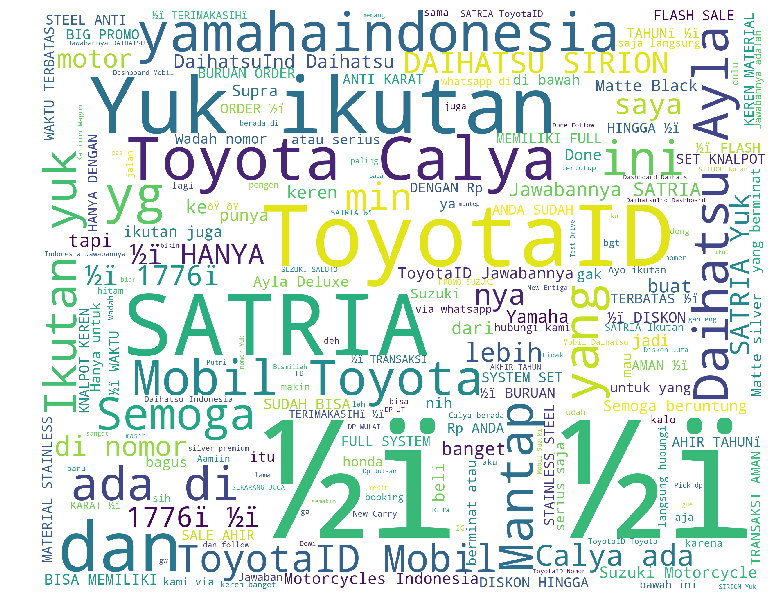

Negative words


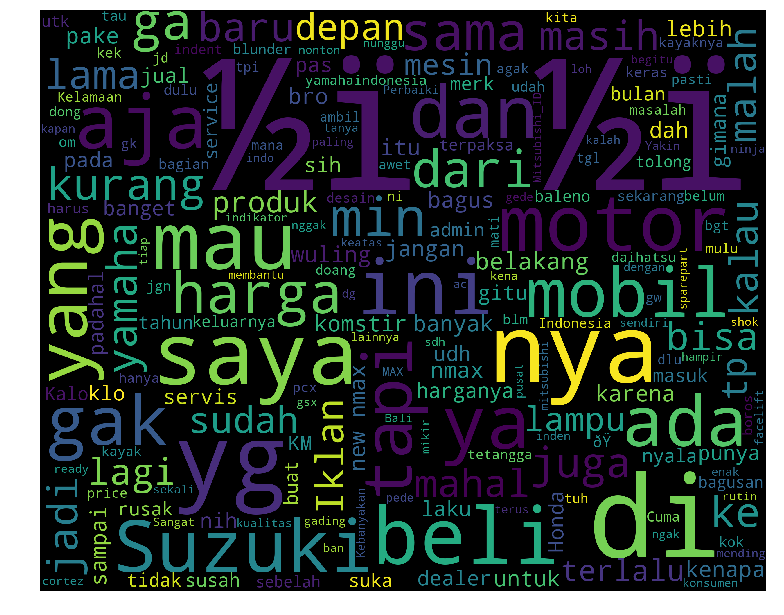

In [27]:
train_pos = train[ train['final_sentiment'] == '2']
train_pos = train_pos['content']

train_neg = train[ train['final_sentiment'] == '1']
train_neg = train_neg['content']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)



In [28]:
content = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.content.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    content.append((words_without_stopwords, row.final_sentiment))

test_pos = test[ test['final_sentiment'] == '2']
test_pos = test_pos['content']
test_neg = test[ test['final_sentiment'] == '1']
test_neg = test_neg['content']

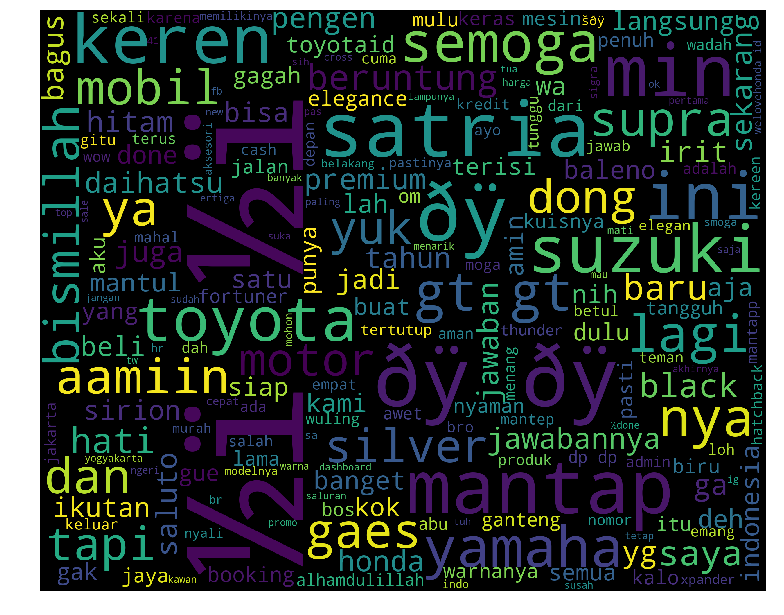

In [29]:
def get_words_in_content(content):
    all = []
    for (words, sentiment) in content:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_content(content))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features
wordcloud_draw(w_features)

In [30]:
training_set = nltk.classify.apply_features(extract_features,content)
classifier = nltk.NaiveBayesClassifier.train(training_set)


In [31]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == '1'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == '2'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    


[Negative]: 95/8 
[Positive]: 1406/1399 


In [32]:
#KETERANGAN_11 : PADA TAHAP INI SAYA MENGGUNAKAN TEKNIK LIMETEXTEXPLAINER DENGAN MODEL YANG SAYA GUNAKAN RANDOMFORESTCLASSIFIER

In [33]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['content_cleansing'] = data['content'].apply(lambda x : remove_punct(x))

data[50:100]

,final_sentiment,content,content_cleansing
370,2,'@aadityanto saya ambil confero S Lux yg 8seat...,aadityanto saya ambil confero S Lux yg 8seat mas
371,2,'@aadityanto Wuling servis nya murah banget ba...,aadityanto Wuling servis nya murah banget bang...
384,2,'@abud_buddy conferoS saya dah hampir setaun p...,abudbuddy conferoS saya dah hampir setaun pemi...
386,2,'@abud_buddy wah lebih murah ya drpd toyota su...,abudbuddy wah lebih murah ya drpd toyota suzuk...
394,1,'@adie_vr4633 iyanih @suzukiindonesiamotor res...,adievr4633 iyanih suzukiindonesiamotor responn...
395,1,"'@adie_vr4633 nahkan, penyakit motor kita sama...",adievr4633 nahkan penyakit motor kita sama om ...
405,1,'@agus_indra_ Iya betul saya juga nunggu2 lama...,agusindra Iya betul saya juga nunggu2 lama men...
407,1,'@agustinusmitsubishi bentuk yg baru ini gembr...,agustinusmitsubishi bentuk yg baru ini gembrot...
425,1,'@al_adynoer bhahahaa teknologi jadul ï¿½ï¿½ï¿...,aladynoer bhahahaa teknologi jadul ï¿½ï¿½ï¿½ï¿½
435,2,'@aleroys fitur lebih unggul dari sebelah,aleroys fitur lebih unggul dari sebelah


In [34]:
X = data['content_cleansing']
y = data['final_sentiment']


vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

/home/rama/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.82      0.18      0.30        77
           2       0.96      1.00      0.98      1424

    accuracy                           0.96      1501
   macro avg       0.89      0.59      0.64      1501
weighted avg       0.95      0.96      0.94      1501



In [35]:
#UJI SENTIMENT POSITIF (INDEKS 2). SAMPEL DATA SAYA AMBIL PADA DATA BARIS 457

pipeline = make_pipeline(vectorizer, rfc)


class_names = ['1', '2']
explainer = LimeTextExplainer(class_names = class_names)

exp = explainer.explain_instance(data['content_cleansing'][457], pipeline.predict_proba, num_features=20, top_labels=1)
print('Probability =', pipeline.predict_proba([data['content_cleansing'][457]]))
exp.show_in_notebook(text=True)

Probability = [[0. 1.]]


In [36]:
#UJI SENTIMENT NEGATIF (INDEKS 1). SAMPEL DATA SAYA AMBIL PADA DATA BARIS 565



pipeline = make_pipeline(vectorizer, rfc)


class_names = ['1', '2']
explainer = LimeTextExplainer(class_names = class_names)

exp = explainer.explain_instance(data['content_cleansing'][565], pipeline.predict_proba, num_features=20, top_labels=1)
print('Probability =', pipeline.predict_proba([data['content_cleansing'][565]]))
exp.show_in_notebook(text=True)

Probability = [[0.6 0.4]]


In [37]:
#KETERANGAN_12 : PADA TAHAPAN INI SAYA MELAKUKAN EVALUASI PERFORMA MODEL MACHINE LEARNING YANG TELAH DI LAKUKAN PADA TAHAP SEBELUMNYA
#PADA TAHAPAN INI SAYA MENGGUNAKAN ARCHITECTURE RNN_LSTM DAN UNTUK MENGURANGI USAHA DALAM MEBANGUNNYA SAYA MENGUNAKN MODEL KERAS

In [38]:
dataset = pd.read_csv('suzuki.csv', sep =';', encoding='cp1252')
data= dataset[['final_sentiment', 'content']]


data = data[data.final_sentiment != "i"]
data = data[data.final_sentiment != "0"]
data = data[data.final_sentiment != "I"]

data['content'] = data['content'].apply(lambda x: x.lower())
data['content'] = data['content'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


print(data[ data['final_sentiment'] == '2'].size)
print(data[ data['final_sentiment'] == '1'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['content'].values)
X = tokenizer.texts_to_sequences(data['content'].values)
X = pad_sequences(X)


9416
588


In [39]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 224, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 224, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
Y = pd.get_dummies(data['final_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3501, 224) (3501, 2)
(1501, 224) (1501, 2)


In [41]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)


Epoch 1/10
 - 55s - loss: 0.2473 - accuracy: 0.9343
Epoch 2/10
 - 53s - loss: 0.1218 - accuracy: 0.9537
Epoch 3/10
 - 53s - loss: 0.0739 - accuracy: 0.9726
Epoch 4/10
 - 56s - loss: 0.0518 - accuracy: 0.9806
Epoch 5/10
 - 55s - loss: 0.0339 - accuracy: 0.9880
Epoch 6/10
 - 56s - loss: 0.0306 - accuracy: 0.9903
Epoch 7/10
 - 53s - loss: 0.0304 - accuracy: 0.9897
Epoch 8/10
 - 54s - loss: 0.0218 - accuracy: 0.9923
Epoch 9/10
 - 53s - loss: 0.0233 - accuracy: 0.9929
Epoch 10/10
 - 54s - loss: 0.0169 - accuracy: 0.9949


In [42]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.00
acc: 1.00


In [43]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")


pos_acc 98.73060648801129 %
neg_acc 60.97560975609756 %


In [44]:
#KETERANGAN_13 : ARCHITECTURE RNN_LSTM_KERAS MENGHASILKAN AKURASI YANG BAIK DAN EPOCH MASIH BOLEH DITINGKATKAN